In [64]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [65]:
np.random.seed(0)
data_size = 1000

temperature = np.random.uniform(low=-10.0, high=50.0, size=data_size)
pressure = np.random.uniform(low=50000.0, high=120000.0, size=data_size)
humidity = np.random.uniform(low=0.0, high=100.0, size=data_size)

df = pd.DataFrame({
    'temperature': temperature,
    'pressure': pressure,
    'humidity': humidity
})

df.head()


temperature      pressure   humidity
0    22.928810  91501.618955  81.151847
1    32.911362  50704.458696  47.608399
2    26.165803  83307.833710  52.315599
3    22.692991  99613.927366  25.052059
4    15.419288  53078.280242  60.504302

In [66]:
df['class'] = np.where(
    (df['temperature'] < 27) & (df['pressure'].between(50000, 102000)) & (df['humidity'] < 60), 
    1, 
    0
)

In [67]:
df.head(20)

temperature       pressure   humidity  class
0     22.928810   91501.618955  81.151847      0
1     32.911362   50704.458696  47.608399      0
2     26.165803   83307.833710  52.315599      1
3     22.692991   99613.927366  25.052059      1
4     15.419288   53078.280242  60.504302      0
5     28.753647  111566.503812  30.290481      0
6     16.255233   86405.699164  57.728401      1
7     43.506380   52146.273383  16.967812      0
8     47.819766   65708.952834  15.946909      0
9     13.006491  116757.298750  41.702974      0
10    37.503502   90762.381314  42.681952      0
11    21.733695   57523.079744  26.810926      1
12    24.082674   70128.115160  13.159685      1
13    45.535798   81969.253810   3.921054      0
14    -5.737837   51466.504849   2.523183      1
15    -4.772242   78813.085953  27.155029      1
16    -8.786896   84262.104480  46.185344      1
17    39.957191   67057.451270  72.624328      0
18    36.689405   91204.730020  47.487170      0
19    42.200729  102726.808371  90.405082      0

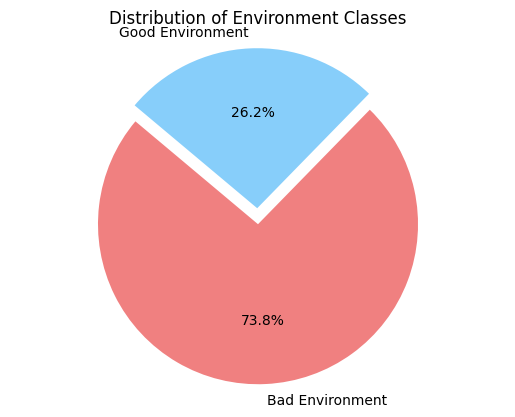

In [68]:
import matplotlib.pyplot as plt

class_counts = df['class'].value_counts()
labels = ['Bad Environment', 'Good Environment']
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  

plt.pie(class_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Distribution of Environment Classes')
plt.axis('equal')  
plt.show()

In [69]:
from sklearn.model_selection import train_test_split

X = df[['temperature', 'pressure', 'humidity']].values
y = df['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [70]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_balanced = scaler.fit_transform(X_train_balanced)
X_test = scaler.transform(X_test)

In [71]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(3,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid') # binarna klasifikacija
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 64)                256       
                                                                 
 dense_25 (Dense)            (None, 32)                2080      
                                                                 
 dense_26 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2369 (9.25 KB)
Trainable params: 2369 (9.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [72]:
history = model.fit(X_train_balanced, y_train_balanced, epochs=20, validation_split=0.2, verbose=1)

Epoch 1/20
30/30 [==============================] - 1s 8ms/step - loss: 0.2046 - accuracy: 0.7447 - val_loss: 0.2149 - val_accuracy: 0.6639
Epoch 2/20
30/30 [==============================] - 0s 4ms/step - loss: 0.1117 - accuracy: 0.8929 - val_loss: 0.1474 - val_accuracy: 0.8109
Epoch 3/20
30/30 [==============================] - 0s 3ms/step - loss: 0.0782 - accuracy: 0.9149 - val_loss: 0.1207 - val_accuracy: 0.8361
Epoch 4/20
30/30 [==============================] - 0s 4ms/step - loss: 0.0653 - accuracy: 0.9191 - val_loss: 0.1020 - val_accuracy: 0.8613
Epoch 5/20
30/30 [==============================] - 0s 3ms/step - loss: 0.0577 - accuracy: 0.9275 - val_loss: 0.0864 - val_accuracy: 0.8908
Epoch 6/20
30/30 [==============================] - 0s 3ms/step - loss: 0.0517 - accuracy: 0.9328 - val_loss: 0.0784 - val_accuracy: 0.8950
Epoch 7/20
30/30 [==============================] - 0s 4ms/step - loss: 0.0457 - accuracy: 0.9401 - val_loss: 0.0691 - val_accuracy: 0.8950
Epoch 8/20
30/30 [==

In [73]:
test_loss, test_mae = model.evaluate(X_test, y_test)

print(f'Test MAE: {test_mae}')

7/7 [==============================] - 0s 2ms/step - loss: 0.0246 - accuracy: 0.9750
Test MAE: 0.9750000238418579


In [76]:
model.save('humidity_prediction_model.h5')

c:\Users\Emma\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [77]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('humidity_prediction_model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Emma\AppData\Local\Temp\tmp0nqmyo5v\assets


INFO:tensorflow:Assets written to: C:\Users\Emma\AppData\Local\Temp\tmp0nqmyo5v\assets
